In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\ammu0\OneDrive - Saint Louis University\Documents\exploratory data analysis\us-counties-2023.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267009 entries, 0 to 267008
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    267009 non-null  object 
 1   county  267009 non-null  object 
 2   state   267009 non-null  object 
 3   fips    264023 non-null  float64
 4   cases   267009 non-null  int64  
 5   deaths  260613 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 12.2+ MB


In [4]:
df.describe()

,fips,cases,deaths
count,264023.000000,2.670090e+05,260613.000000
mean,31487.972877,3.146473e+04,352.209924
std,16376.532871,1.193119e+05,1322.158230
min,1001.000000,0.000000e+00,0.000000
25%,19035.000000,3.147000e+03,48.000000
50%,30027.000000,7.955000e+03,111.000000
75%,46121.000000,2.071100e+04,262.000000
max,78030.000000,3.723182e+06,45155.000000


In [5]:
df.head()

,date,county,state,fips,cases,deaths
0,2023-01-01,Autauga,Alabama,1001.0,18961,230.0
1,2023-01-01,Baldwin,Alabama,1003.0,67496,719.0
2,2023-01-01,Barbour,Alabama,1005.0,7027,111.0
3,2023-01-01,Bibb,Alabama,1007.0,7692,108.0
4,2023-01-01,Blount,Alabama,1009.0,17731,260.0


In [6]:
df.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
267004    False
267005    False
267006    False
267007    False
267008    False
Length: 267009, dtype: bool

In [7]:
df.shape

(267009, 6)

In [8]:
df.isnull().sum()

date         0
county       0
state        0
fips      2986
cases        0
deaths    6396
dtype: int64

In [9]:
df.fillna(0)

,date,county,state,fips,cases,deaths
0,2023-01-01,Autauga,Alabama,1001.0,18961,230.0
1,2023-01-01,Baldwin,Alabama,1003.0,67496,719.0
2,2023-01-01,Barbour,Alabama,1005.0,7027,111.0
3,2023-01-01,Bibb,Alabama,1007.0,7692,108.0
4,2023-01-01,Blount,Alabama,1009.0,17731,260.0
...,...,...,...,...,...,...
267004,2023-03-23,Sweetwater,Wyoming,56037.0,12519,139.0
267005,2023-03-23,Teton,Wyoming,56039.0,12150,16.0
267006,2023-03-23,Uinta,Wyoming,56041.0,6416,43.0
267007,2023-03-23,Washakie,Wyoming,56043.0,2700,51.0


In [10]:
df.isnull().sum()

date         0
county       0
state        0
fips      2986
cases        0
deaths    6396
dtype: int64

In [11]:
df.dropna(how = "any")

,date,county,state,fips,cases,deaths
0,2023-01-01,Autauga,Alabama,1001.0,18961,230.0
1,2023-01-01,Baldwin,Alabama,1003.0,67496,719.0
2,2023-01-01,Barbour,Alabama,1005.0,7027,111.0
3,2023-01-01,Bibb,Alabama,1007.0,7692,108.0
4,2023-01-01,Blount,Alabama,1009.0,17731,260.0
...,...,...,...,...,...,...
267004,2023-03-23,Sweetwater,Wyoming,56037.0,12519,139.0
267005,2023-03-23,Teton,Wyoming,56039.0,12150,16.0
267006,2023-03-23,Uinta,Wyoming,56041.0,6416,43.0
267007,2023-03-23,Washakie,Wyoming,56043.0,2700,51.0


In [12]:
df_clean = df.dropna()

In [13]:
print("Before:", df.shape)
print("after :", df_clean.shape)

Before: (267009, 6)
after : (257627, 6)


In [14]:
df[df.duplicated()]

,date,county,state,fips,cases,deaths


In [15]:
df.duplicated().sum()

0

In [16]:
df['date'] = pd.to_datetime(df['date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267009 entries, 0 to 267008
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    267009 non-null  datetime64[ns]
 1   county  267009 non-null  object        
 2   state   267009 non-null  object        
 3   fips    264023 non-null  float64       
 4   cases   267009 non-null  int64         
 5   deaths  260613 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 12.2+ MB


In [18]:
df.head()

,date,county,state,fips,cases,deaths
0,2023-01-01,Autauga,Alabama,1001.0,18961,230.0
1,2023-01-01,Baldwin,Alabama,1003.0,67496,719.0
2,2023-01-01,Barbour,Alabama,1005.0,7027,111.0
3,2023-01-01,Bibb,Alabama,1007.0,7692,108.0
4,2023-01-01,Blount,Alabama,1009.0,17731,260.0


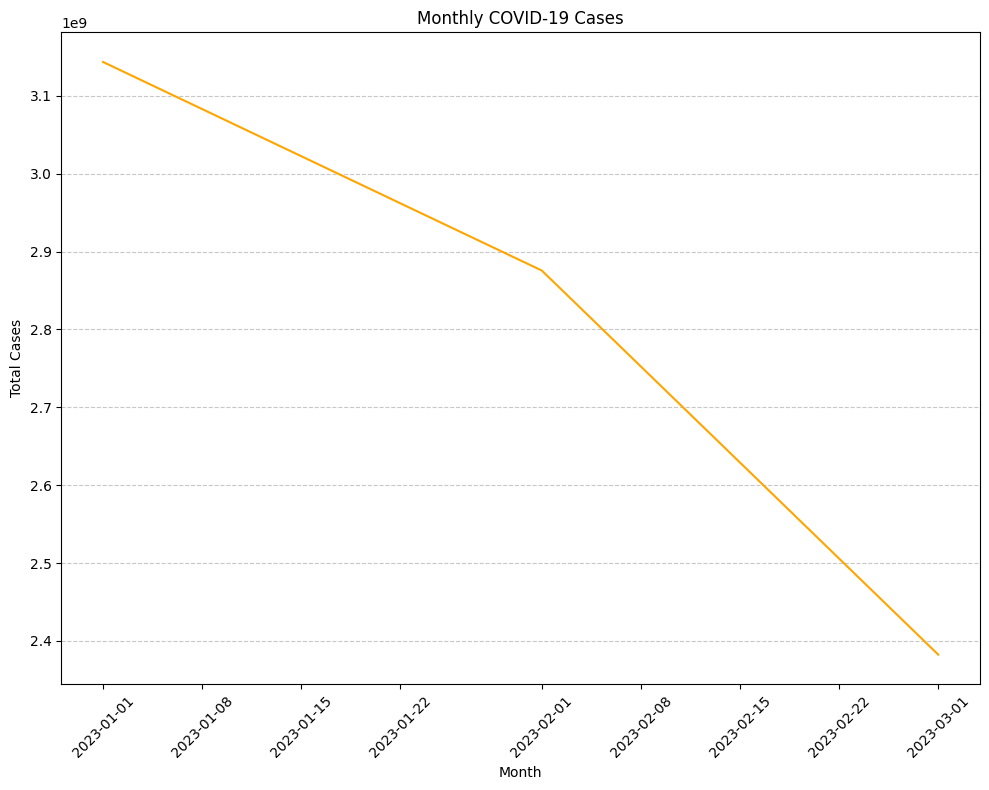

In [112]:
#how did the covid cases change month by month across the us

import matplotlib.pyplot as plt
import pandas as pd

df["date"] = pd.to_datetime(df["date"])

monthly_cases = df.groupby(df["date"].dt.to_period("M"))["cases"].sum().reset_index()
monthly_cases["date"] = monthly_cases["date"].dt.to_timestamp()  # convert Period to Timestamp

# Plot
plt.figure(figsize=(10,8))
plt.plot(monthly_cases["date"], monthly_cases["cases"], color="orange")
plt.title("Monthly COVID-19 Cases")
plt.xlabel("Month")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()




Conclusion for above question, as month passes covid cases decreased, compare to january, in march the cases are low.

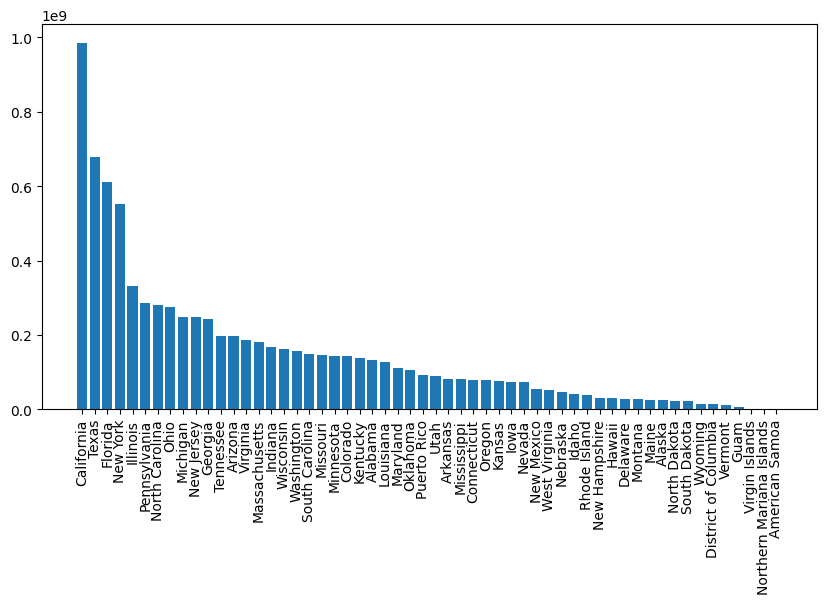

In [23]:
#Top Affected states in usa 


import matplotlib.pyplot as plt
import pandas as pd
    
# count = df["state"].value_counts()
cases_by_state = df.groupby("state")["cases"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.bar(cases_by_state.index, cases_by_state.values)
plt.xticks(rotation=90)
plt.show()



We can conclude that the states like california, texas, florida, newyork has the highest number of covid cases in usa.

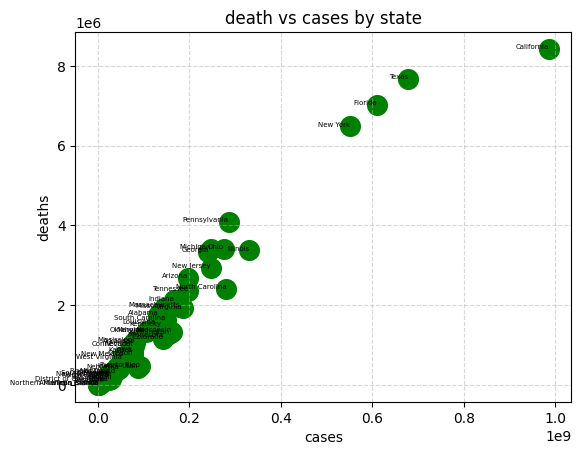

In [24]:
#The relationship between totalcases and total deaths by state

import matplotlib.pyplot as plt
import pandas as pd

total_cases = df.groupby("state")[["cases","deaths"]].sum()

plt.scatter(total_cases["cases"], total_cases["deaths"],color="green", s=200)

for state, (x, y) in total_cases.iterrows():
    plt.text(x, y, state, fontsize=5, ha='right')

plt.title("death vs cases by state")
plt.xlabel('cases')
plt.ylabel('deaths')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [25]:
corr = total_cases["cases"].corr(total_cases["deaths"])
print("Correlation between cases and deaths:", corr)

Correlation between cases and deaths: 0.9751035224336837


conclusion:

The points in the figure formed a diagonal upward line, which means states with more cases also have more deaths -  a positive correlation

Calcualte correlation coefficient is 0.975, which equal to 1 that means it have strong positive correlation.

States tha thad more covid cases also experiences more deaths.

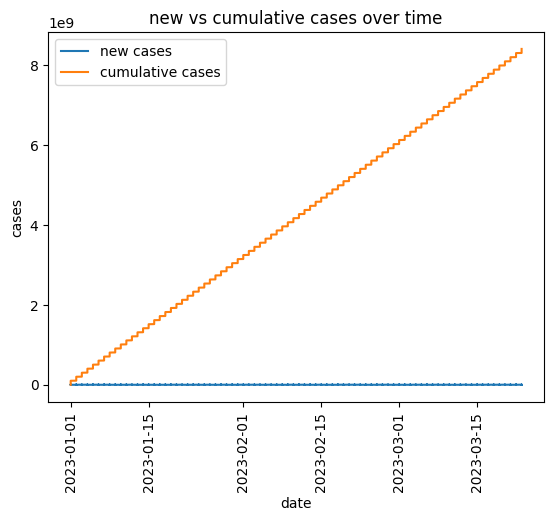

In [26]:
# How do new daily cases compare to cumulative totals over time.

import matplotlib.pyplot as plt
import pandas as pd

df = df.sort_values('date')  # ensure dates are sorted
df['new_cases'] = df['cases'].diff().fillna(0)

df["cum_cases"] = df["cases"].cumsum()

plt.plot(df["date"],df["new_cases"], label="new cases")

plt.plot(df["date"], df["cum_cases"], label="cumulative cases")

plt.legend()
plt.title("new vs cumulative cases over time")
plt.xlabel("date")
plt.ylabel("cases")
plt.xticks(rotation=90)
plt.show()



conclusion:

The steady upward cumulative line shows that the same number of cases were added each day, so that's the resaon is slooping upwards.
when coming tot the new cases that is in staright line that emans the same number of new cases were recorderd every day, that means no spikes in the cases.

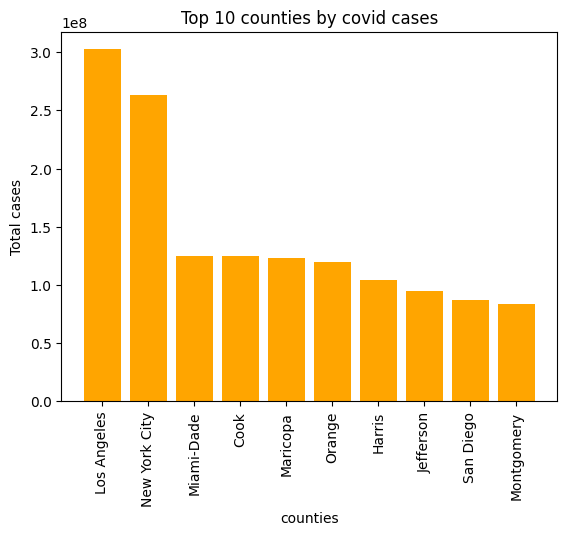

In [41]:
#To know which counties have more cases

county_cases = df.groupby("county")["cases"].sum().sort_values(ascending=False).head(10)
plt.bar(county_cases.index, county_cases.values, color="orange")
plt.title("Top 10 counties by covid cases")
plt.ylabel('Total cases')
plt.xlabel('counties')
plt.xticks(rotation=90)
plt.show()




Conclusion: Los anageles have more cases than any other counties

<Axes: xlabel='date', ylabel='county'>

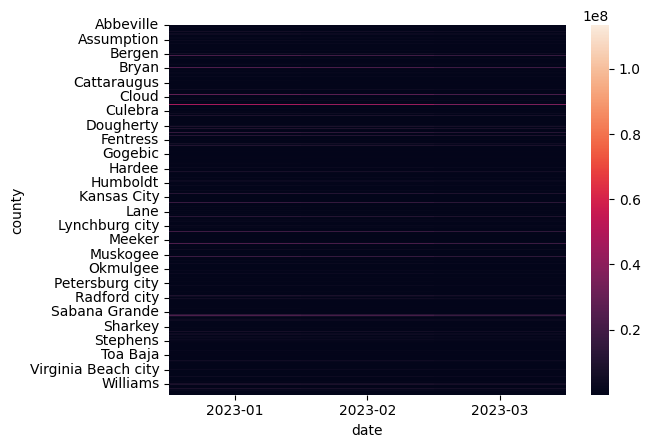

In [104]:
#Which counties had the most significant number of cases per month


import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

county_month = df.groupby(["county", df["date"].dt.to_period("M")])["cases"].sum().unstack()

sns.heatmap(county_month)



conclusion: The darkerside of the counties have less cases, and lighter side shows that those have more cases

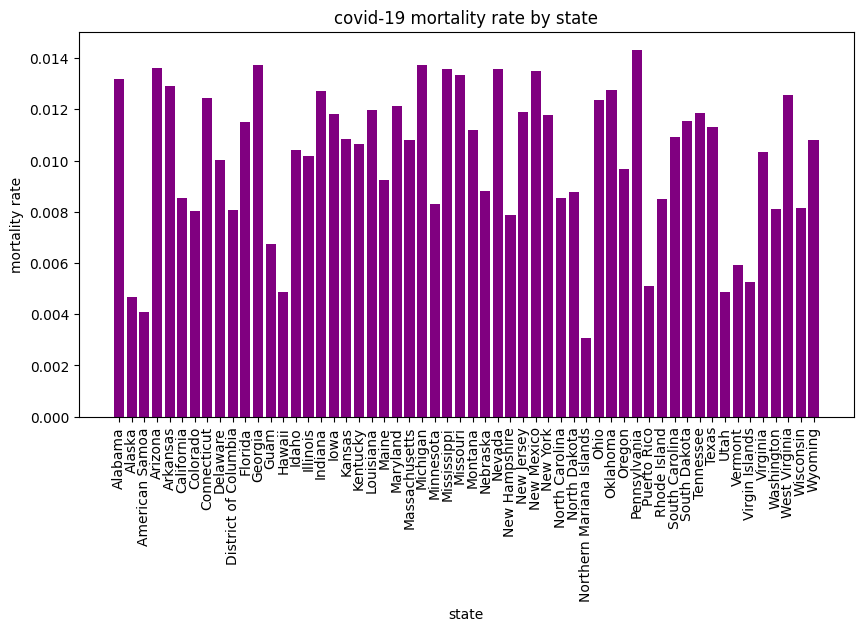

In [96]:
#what was the average death rate by state
import matplotlib.pyplot as plt
import pandas as pd
state_stats = df.groupby("state")[["cases", "deaths"]].sum()

state_stats["mortality_rate"] = state_stats["deaths"]/state_stats["cases"]
plt.figure(figsize=(10,5))
plt.bar(state_stats.index, state_stats["mortality_rate"], color = "purple")

plt.xticks(rotation=90)
plt.xlabel("state")
plt.ylabel("mortality rate")
plt.title("covid-19 mortality rate by state")
plt.show()

Conclusion:

By seeing the bar graph, the Pennsylvania have highest mortality rate 
and least comes the nothern mariana islands.

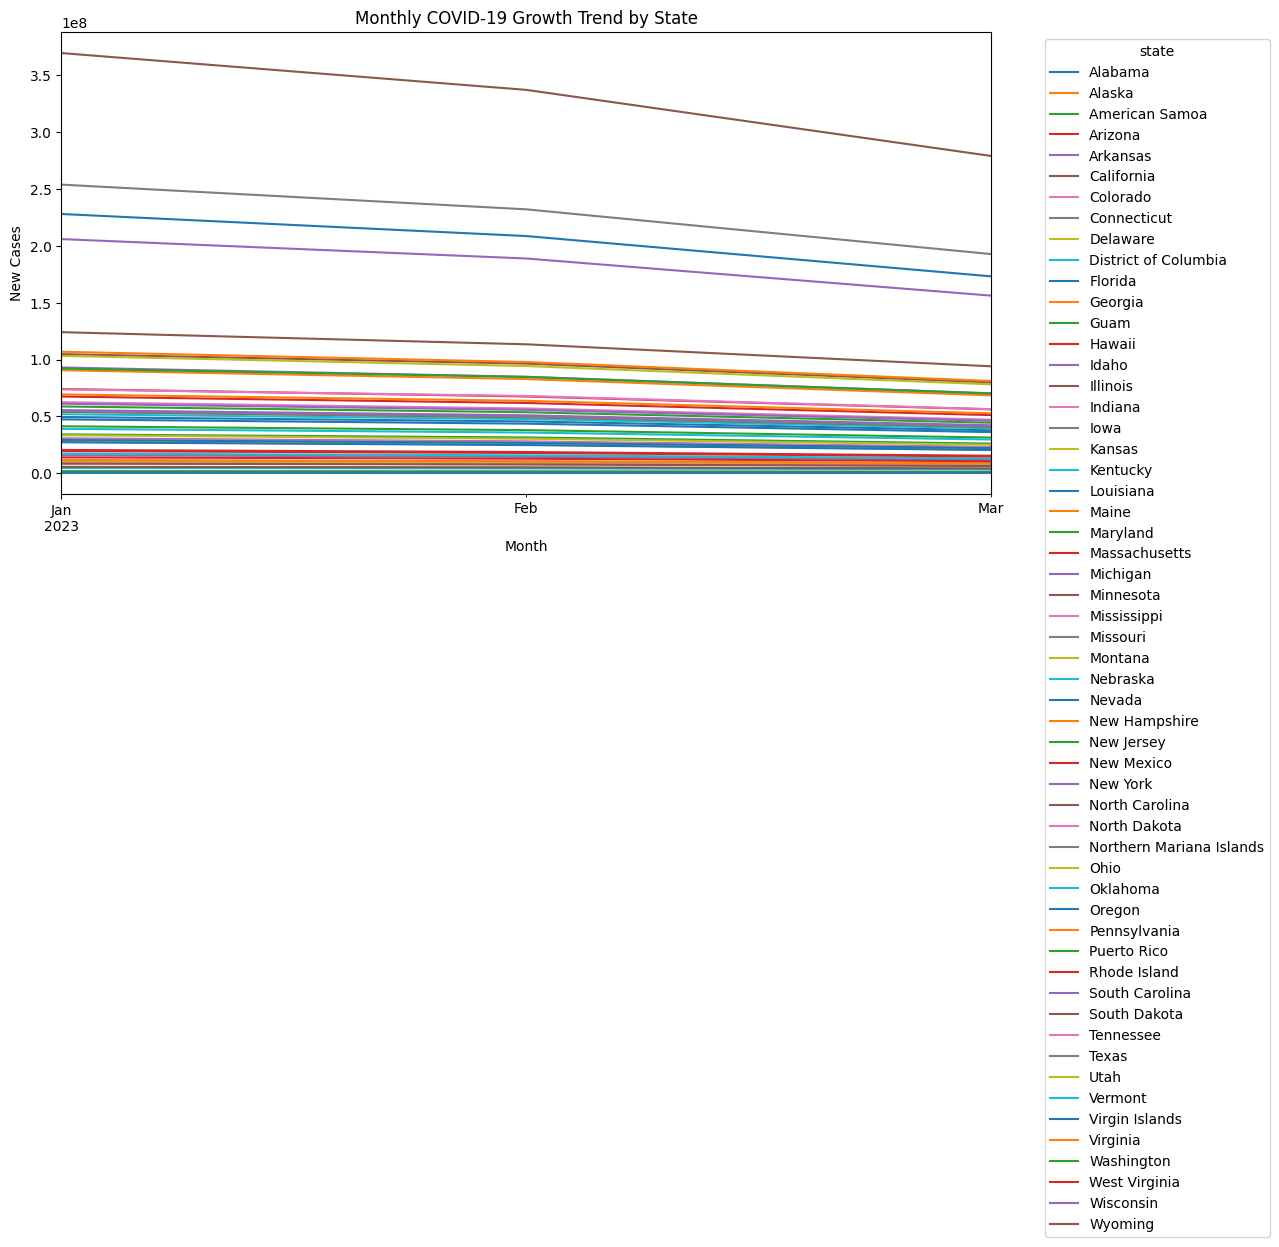

In [97]:
#How did the number of cases per month evolve in each state


monthly_state = df.groupby([df['date'].dt.to_period('M'), 'state'])['cases'].sum().unstack()



monthly_state.plot(figsize=(12,6))
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", title ="state")
plt.title('Monthly COVID-19 Growth Trend by State')
plt.xlabel('Month')
plt.ylabel('New Cases')
plt.show()


month            2023-01   2023-02   2023-03
state                                       
Alabama         49498504  45623277  37827896
Alaska           9391473   8564606   7085440
American Samoa    257106    232652    191107
Arizona         74119836  67536483  56232032
Arkansas        30748154  28018928  23163281


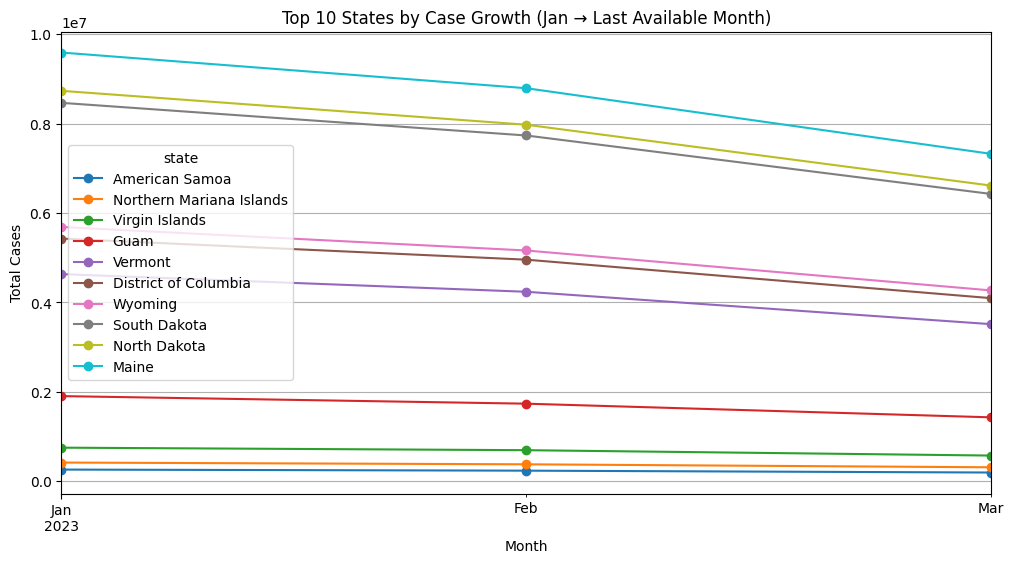

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Example: assuming df has columns 'state', 'date', 'cases' ---
# Convert 'date' column to datetime (if not already)
df['date'] = pd.to_datetime(df['date'])

# Extract month-year for grouping
df['month'] = df['date'].dt.to_period('M')

# Aggregate total cases per state per month
monthly_state = df.groupby(['state', 'month'])['cases'].sum().unstack()

# Display the first few rows (optional)
print(monthly_state.head())

# --- Calculate growth between first and last available month ---
growth = monthly_state.iloc[:, -1] - monthly_state.iloc[:, 0]

# --- Select top 10 states with highest growth ---
top10_states = growth.sort_values(ascending=False).head(10).index

# --- Plot monthly trends for top 10 states ---
monthly_state.loc[top10_states].T.plot(figsize=(12, 6), marker='o')
plt.title('Top 10 States by Case Growth (Jan → Last Available Month)')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.grid(True)
plt.show()


peak day: 2023-03-23
peak cases: 3723182


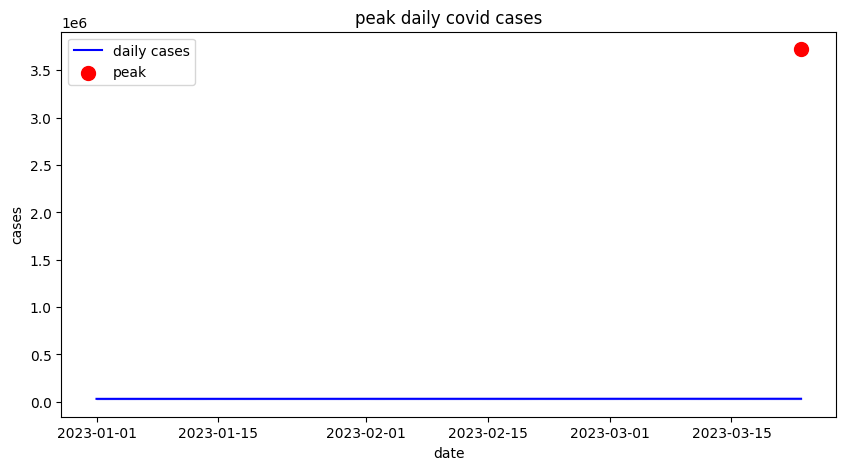

In [103]:
#when did highest daily or monthly spikes occured

df["date"] = pd.to_datetime(df["date"])
peak_day = df.loc[df["cases"].idxmax()]

plt.figure(figsize=(10,5))
sns.lineplot(x='date', y='cases', data=df, color='blue', label='daily cases')

plt.scatter(peak_day["date"], peak_day["cases"], color='red', s=100, label='peak')

plt.title('peak daily covid cases')
plt.xlabel("date")
plt.ylabel("cases")
plt.legend()

print("peak day:", peak_day["date"].date())
print("peak cases:", peak_day["cases"])
      